# 第12回ハンズオン: PyTorchによる2層NN（コメント強化版）

In [1]:
# 必要なライブラリの読み込み
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# データ準備と前処理
X, y = load_digits(return_X_y=True)
y = y.reshape(-1, 1)
enc = OneHotEncoder(sparse_output=False)
y_onehot = enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42)
X_train = torch.tensor(X_train / 16.0, dtype=torch.float32)
X_test = torch.tensor(X_test / 16.0, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [3]:
# PyTorch用のDataLoader（ミニバッチ学習のため）
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [4]:
# NumPy版と同じ構造のネットワーク（活性化関数：Sigmoid）
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(64, 64)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(64, 10)
    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = SimpleNN()

In [5]:
# 二乗誤差損失（MSE）とSGDで学習
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [16]:
# 学習ループ
losses = []
epochs = 2000
for epoch in range(epochs):
    epoch_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()              # 勾配の初期化
        preds = model(xb)                  # 順伝播
        loss = criterion(preds, yb)       # 損失計算
        loss.backward()                    # 逆伝播
        optimizer.step()                  # パラメータ更新
        epoch_loss += loss.item()
    losses.append(epoch_loss / len(train_loader))
print("最終ロス:", losses[-1])

最終ロス: 0.006959861912764609


In [17]:
# テストデータで精度を評価
with torch.no_grad():
    preds = model(X_test)
    pred_labels = torch.argmax(preds, dim=1)
    true_labels = torch.argmax(y_test, dim=1)
    print("テスト精度:", accuracy_score(true_labels.numpy(), pred_labels.numpy()))

テスト精度: 0.9629629629629629


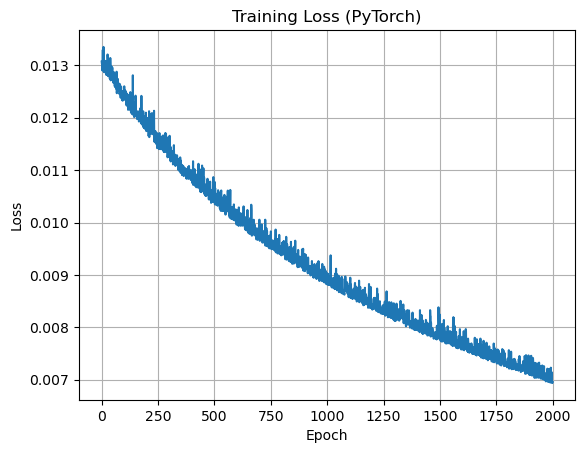

In [18]:
# 学習中の損失推移を可視化
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss (PyTorch)')
plt.grid(True)
plt.show()